In [163]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt


# Text Preprocessing Phase

In [164]:
newsgroups_data = fetch_20newsgroups(subset='all')

## Data Preprocessing

In [165]:
# Preprocess the text data
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = newsgroups_data.data # list of text data
stop_words = set(stopwords.words('english')) # set of stop words
stemmer = PorterStemmer()  # Optional: Add stemming if needed

In [166]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [167]:
stemmer

<PorterStemmer>

In [168]:
# Tokenize the text and remove stopwords
from nltk.tokenize import word_tokenize

def process_text(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [stemmer.stem(word) for word in tokens]
    return " ".join(tokens)

In [169]:
processed_data = [process_text(text) for text in corpus]

In [170]:
processed_data[0]

'from mamatha devineni ratnam subject pen fan reaction organ post offic carnegi mellon pittsburgh pa line i sure basher pen fan pretti confus lack kind post recent pen massacr devil actual i bit puzzl bit reliev howev i go put end relief bit prais pen man kill devil wors i thought jagr show much better regular season stat he also lot fo fun watch playoff bowman let jagr lot fun next coupl game sinc pen go beat pulp jersey anyway i disappoint see island lose final regular season game pen rule'

## Document Term Matrix

In [181]:
# Convert the text into a document-term matrix with term frequency
vectorizer = TfidfVectorizer(use_idf=True, max_features=1000)
X = vectorizer.fit_transform(processed_data)

In [182]:
X.shape

(18846, 1000)

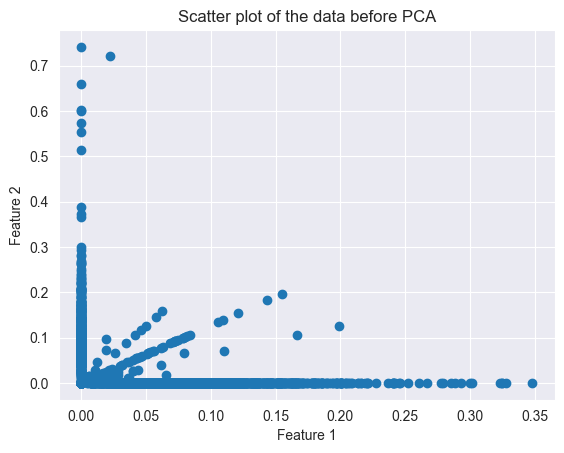

In [183]:
# Before PCA (scatter plot for 2D data)
plt.scatter(X.toarray()[:, 0], X.toarray()[:, 1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of the data before PCA')
plt.show()


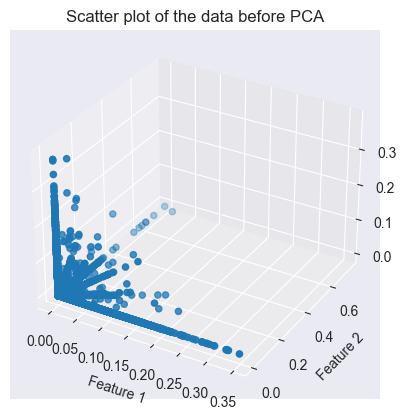

In [184]:
# Before PCA (scatter plot for 3D data)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.toarray()[:, 0], X.toarray()[:, 1], X.toarray()[:, 2])
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('Scatter plot of the data before PCA')
plt.show()

# Dimensionality Reduction Phase
 - Apply PCA for dimensionality reduction
  - Split the data into training and test sets

In [198]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=100) # Optional: Set the number of components to keep
X_pca = pca.fit_transform(X.toarray())

In [199]:
print(pca.components_)

[[ 0.00038813  0.02045638  0.0337456  ...  0.0655472   0.01440319
   0.01707108]
 [-0.02108229 -0.01053446 -0.03403611 ... -0.03607909  0.01239578
  -0.01084641]
 [ 0.02919083 -0.00461529 -0.01998481 ...  0.03352011  0.00189489
  -0.00482365]
 ...
 [-0.00530835 -0.00822538  0.00458201 ...  0.03758545  0.00595538
   0.0004642 ]
 [ 0.00914696 -0.01467156  0.01736994 ...  0.01663818 -0.01314913
  -0.02228438]
 [-0.00137242  0.01837622  0.01000111 ...  0.17234543  0.01217261
   0.02600178]]


In [200]:
X_pca.shape

(18846, 100)

In [206]:
# Split the data into training and test sets
X_train, X_test = train_test_split(X_pca, test_size=0.2, random_state=42)

In [207]:
X_train.shape

(15076, 100)

In [208]:
X_test.shape

(3770, 100)

In [209]:
X_train

array([[-0.05689613, -0.02236497, -0.00629015, ..., -0.05967174,
         0.02449127,  0.03177294],
       [-0.01951216,  0.05977042, -0.04286314, ...,  0.03363066,
         0.00639134,  0.0173024 ],
       [ 0.03804276,  0.02255026,  0.02676093, ..., -0.05240322,
        -0.01630045, -0.02771602],
       ...,
       [-0.18606119, -0.04974428,  0.02197253, ..., -0.07897231,
        -0.09598379, -0.03135268],
       [-0.07016511,  0.12776265, -0.03514144, ...,  0.01091078,
         0.07086868, -0.0049846 ],
       [ 0.04525978, -0.05424533, -0.05913957, ...,  0.02774263,
         0.03501221, -0.00176568]])

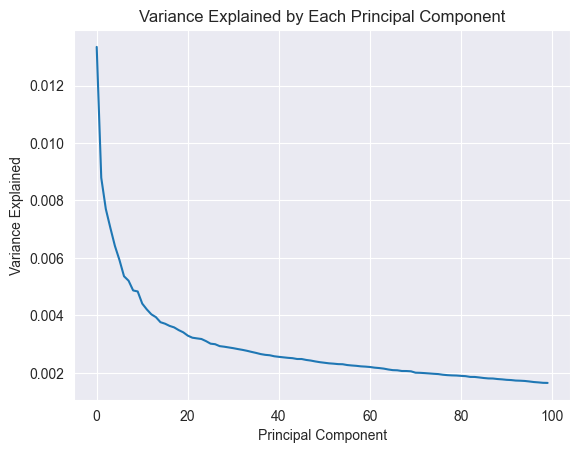

In [210]:
# Variance explained by each principal component
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by Each Principal Component')
plt.show()

In [236]:
X_pca

array([[ 0.06618059,  0.24020968,  0.11851516, ..., -0.01590026,
        -0.01190834, -0.01985785],
       [-0.22125988,  0.01395189, -0.04983269, ...,  0.04617286,
        -0.03041405,  0.03550361],
       [ 0.14841871, -0.0164935 ,  0.02003624, ...,  0.00522012,
        -0.01572595, -0.00199194],
       ...,
       [-0.04835925,  0.00078809,  0.02191741, ..., -0.00444368,
         0.0120969 ,  0.04006366],
       [-0.00033064, -0.00655198, -0.05345487, ..., -0.01692779,
         0.05443166, -0.07331172],
       [-0.0007141 , -0.02517697,  0.04690832, ...,  0.03299335,
        -0.00668912,  0.01395393]])

In [237]:
print(len(X_pca))

18846


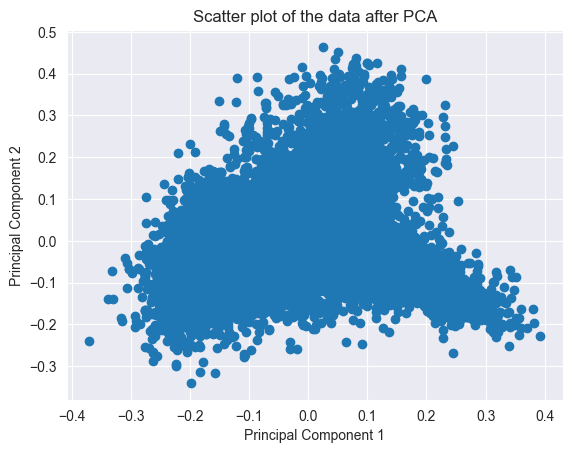

In [211]:
# After PCA (scatter plot for 2D data) and fill color based on the class
plt.scatter(X_pca[:, 0], X_pca[:, 1], label='A')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter plot of the data after PCA')
plt.show()

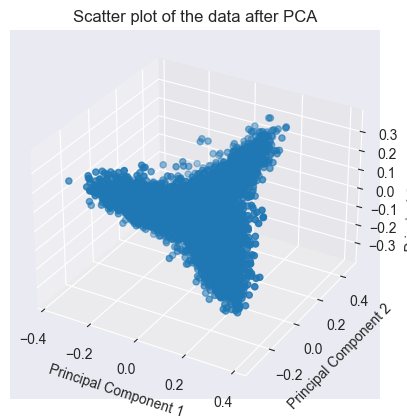

In [213]:
# After PCA (scatter plot for 3D data)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2])
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Scatter plot of the data after PCA')
plt.show()

# Train the OneClassSVM model

In [214]:
ocsvm = OneClassSVM(kernel='rbf', gamma='scale', nu=0.1)
ocsvm.fit(X_train)

OneClassSVM(nu=0.1)

In [216]:
y_pred = ocsvm.predict(X_test)

In [217]:
print(classification_report(np.ones(len(X_test)), y_pred))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         1.0       1.00      0.91      0.95      3770

    accuracy                           0.91      3770
   macro avg       0.50      0.45      0.48      3770
weighted avg       1.00      0.91      0.95      3770


C:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [218]:
print(f"Number of anomalies detected: {sum(y_pred == -1)}")

Number of anomalies detected: 356


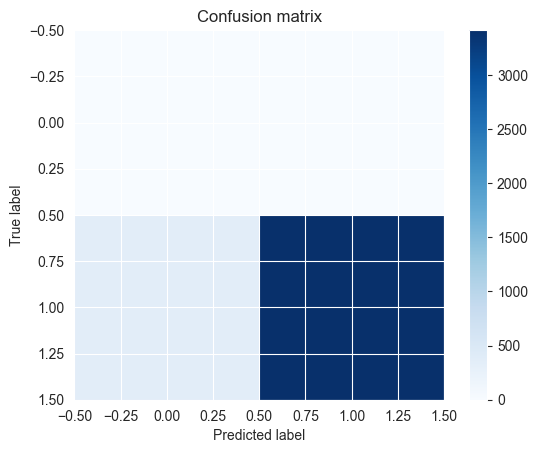

In [219]:
# Confusion matrix
plt.imshow(confusion_matrix(np.ones(len(X_test)), y_pred), cmap='Blues', interpolation='None')
plt.colorbar()
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [221]:
# Assuming you have normal_data and anomalous_data after PCA
normal_data = X_train
anomalous_data = X_test[y_pred == -1]

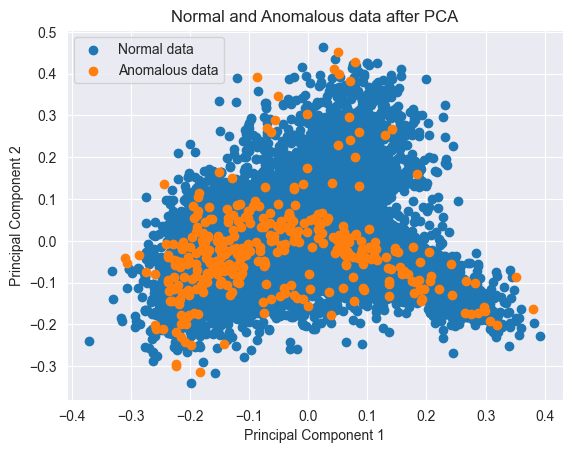

In [222]:
# Plot the normal and anomalous data
plt.scatter(normal_data[:, 0], normal_data[:, 1], label='Normal data')
plt.scatter(anomalous_data[:, 0], anomalous_data[:, 1], label='Anomalous data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Normal and Anomalous data after PCA')
plt.legend()
plt.show()